In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('Car Sales with surname.csv', sep = ";")

In [50]:
df

,Car_id,Date,Customer surname,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Rodriquez,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Sherman,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Ball,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Moran,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Car_id - Unique identifier for each car.
Date - Date of the car sale transaction.
Customer surname - Surname of the customer purchasing the car.
Customer Name - Name of the customer purchasing the car.
Gender - Gender of the customer (e.g., Male, Female).
Annual Income - Annual income of the customer.
Dealer_Name - Name of the car dealer associated with the sale.
Company - Company or brand of the car.
Model - Model name of the car.
Engine - Specifications of the car's engine.
Transmission - Type of transmission in the car (e.g., Automatic, Manual).
Color - Color of the car's exterior.
Price ($) - Price
Dealer_No - Dealer identification number associated with the sale.
Body Style - Style or design of the car's body (e.g., Sedan, SUV).
Phone - Contact phone number associated with the car sale.
Dealer_Region - Geographic region or location of the car dealer.

*1.Изучение загруженного датасета.*

In [51]:
#определение размера датасета
df.shape

(23906, 17)

In [52]:
#переименование столбцов датасета
df = df.rename(columns = lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
df = df.rename(columns = {'price_($)': 'price'})
df.head(10)

,car_id,date,customer_surname,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,dealer_no_,body_style,phone,dealer_region
0,C_CND_000001,1/2/2022,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,Sharp,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,Chavez,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,Jones,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,Morgan,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,Sanchez,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale


In [53]:
#информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   car_id            23906 non-null  object
 1   date              23906 non-null  object
 2   customer_surname  23906 non-null  object
 3   customer_name     23905 non-null  object
 4   gender            23906 non-null  object
 5   annual_income     23906 non-null  int64 
 6   dealer_name       23906 non-null  object
 7   company           23906 non-null  object
 8   model             23906 non-null  object
 9   engine            23906 non-null  object
 10  transmission      23906 non-null  object
 11  color             23906 non-null  object
 12  price             23906 non-null  int64 
 13  dealer_no_        23906 non-null  object
 14  body_style        23906 non-null  object
 15  phone             23906 non-null  int64 
 16  dealer_region     23906 non-null  object
dtypes: int64(3),

In [54]:
#опреление типов данных
df.dtypes

car_id              object
date                object
customer_surname    object
customer_name       object
gender              object
annual_income        int64
dealer_name         object
company             object
model               object
engine              object
transmission        object
color               object
price                int64
dealer_no_          object
body_style          object
phone                int64
dealer_region       object
dtype: object

In [55]:
#смена типа данных для столбца с датой
df['date'] = pd.to_datetime(df['date'])

In [56]:
#статистические характеристики числовых столбцов
df.describe()

,date,annual_income,price,phone
count,23906,2.390600e+04,23906.000000,2.390600e+04
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846,7.497741e+06
min,2022-01-02 00:00:00,1.008000e+04,1200.000000,6.000101e+06
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000,6.746495e+06
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000,7.496198e+06
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000,8.248146e+06
max,2023-12-31 00:00:00,1.120000e+07,85800.000000,8.999579e+06
std,NaN,7.200064e+05,14788.687608,8.674920e+05


In [57]:
#статистические характеристики остальных столбцов
df.describe(include = 'object')

,car_id,customer_surname,customer_name,gender,dealer_name,company,model,engine,transmission,color,dealer_no_,body_style,dealer_region
count,23906,23906,23905,23906,23906,23906,23906,23906,23906,23906,23906,23906,23906
unique,23906,1024,3021,2,28,30,154,2,2,3,7,5,7
top,C_CND_023906,Morton,Thomas,Male,Progressive Shippers Cooperative Association No,Chevrolet,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,85257-3102,SUV,Austin
freq,1,24,92,18798,1318,1819,418,12571,12571,11256,3814,6374,4135


In [13]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*100)

car_id
['C_CND_000001' 'C_CND_000002' 'C_CND_000003' ... 'C_CND_023904'
 'C_CND_023905' 'C_CND_023906']
----------------------------------------------------------------------------------------------------
customer_name
['Geraldine' 'Gia' 'Gianna' ... 'Pol' 'Teho' 'Djamel Epoine']
----------------------------------------------------------------------------------------------------
gender
['Male' 'Female']
----------------------------------------------------------------------------------------------------
dealer_name
["Buddy Storbeck's Diesel Service Inc" 'C & M Motors Inc' 'Capitol KIA'
 'Chrysler of Tri-Cities' 'Chrysler Plymouth' 'Classic Chevy'
 'Clay Johnson Auto Sales' 'U-Haul CO' 'Rabun Used Car Sales'
 'Race Car Help' 'Saab-Belle Dodge' 'Scrivener Performance Engineering'
 'Diehl Motor CO Inc' 'Star Enterprises Inc' 'Suburban Ford'
 'Tri-State Mack Inc' 'Progressive Shippers Cooperative Association No'
 'Ryder Truck Rental and Leasing' 'Enterprise Rent A Car'
 'Gartner Buick Hyund

_2.EDA:_
"Чистка" данных (удаление строк с null значениями, проверка на наличие дубликатов, удаление столбцов, неинформативных для анализа.
Группировка данных с построением графиков.

In [58]:
#определение количества отсутствующих значений в столбцах
df.isnull().sum()

car_id              0
date                0
customer_surname    0
customer_name       1
gender              0
annual_income       0
dealer_name         0
company             0
model               0
engine              0
transmission        0
color               0
price               0
dealer_no_          0
body_style          0
phone               0
dealer_region       0
dtype: int64

In [59]:
#удалим строку, содержащую null значения в столбце customer_name
df = df.dropna(subset = ['customer_name'])
df.isnull().sum()

car_id              0
date                0
customer_surname    0
customer_name       0
gender              0
annual_income       0
dealer_name         0
company             0
model               0
engine              0
transmission        0
color               0
price               0
dealer_no_          0
body_style          0
phone               0
dealer_region       0
dtype: int64

In [60]:
#проверка на наличие дубликатов.
df.duplicated().sum()

0

In [61]:
#удаление столбцов phone" и "dealer_no"(соответствует региону диллера) из-за неинформативности для анализа.

df.drop(['phone', 'dealer_no_'], axis=1, inplace=True)
df

,car_id,date,customer_surname,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region
0,C_CND_000001,2022-01-02,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,C_CND_000002,2022-01-02,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,C_CND_000003,2022-01-02,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,C_CND_000004,2022-01-02,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,C_CND_000005,2022-01-02,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Rodriquez,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco
23902,C_CND_023903,2023-12-31,Sherman,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown
23903,C_CND_023904,2023-12-31,Ball,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale
23904,C_CND_023905,2023-12-31,Moran,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,Passenger,Austin


In [62]:
#исправление значения в столбце Engine
df['engine'] = df['engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft')
df.head()

,car_id,date,customer_surname,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region
0,C_CND_000001,2022-01-02,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,C_CND_000002,2022-01-02,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,C_CND_000003,2022-01-02,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,C_CND_000004,2022-01-02,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,C_CND_000005,2022-01-02,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [63]:

df.date.max()

Timestamp('2023-12-31 00:00:00')

In [64]:
df.date.min()

Timestamp('2022-01-02 00:00:00')

In [65]:
#создание новых столбцов
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df

,car_id,date,customer_surname,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region,month,year
0,C_CND_000001,2022-01-02,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown,1,2022
1,C_CND_000002,2022-01-02,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora,1,2022
2,C_CND_000003,2022-01-02,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,1,2022
3,C_CND_000004,2022-01-02,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,1,2022
4,C_CND_000005,2022-01-02,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Rodriquez,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco,12,2023
23902,C_CND_023903,2023-12-31,Sherman,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Double Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown,12,2023
23903,C_CND_023904,2023-12-31,Ball,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale,12,2023
23904,C_CND_023905,2023-12-31,Moran,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,Double Overhead Camshaft,Auto,Black,31000,Passenger,Austin,12,2023


In [66]:
#создание сводной таблицы кол-ва проданных авто по месяцам
df_pivot = df.pivot_table(index='month',
               columns='year',
               aggfunc={'date': 'count'},
               fill_value=0)
df_pivot

date      
year   2022  2023
month            
1       315   475
2       320   415
3       705   830
4       800   855
5       750  1145
6       690  1025
7       700  1025
8       810   895
9      1475  1830
10      835   995
11     1619  1850
12     1625  1921

<Figure size 640x480 with 0 Axes>

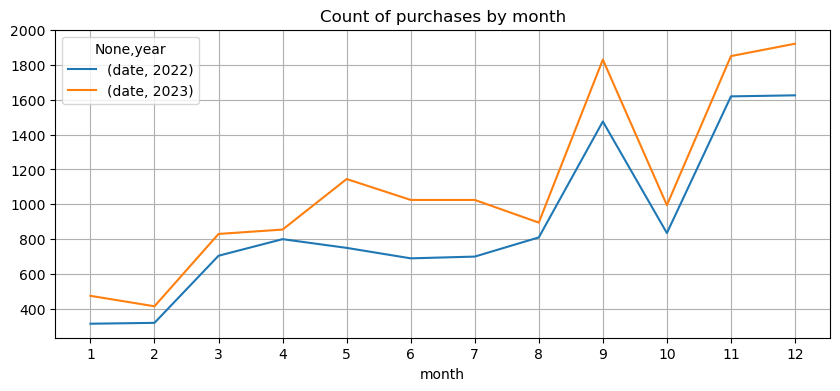

In [67]:
plt.figure()

df_pivot.plot(title = 'Сount of purchases by month', figsize=(10, 4))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.grid(True)

Очевидна положительная динамика по количеству покупок авто в 2023 году относительно каждого месяца предыдущего года. Минимальное количество продаж было в январе 2022 года, максимальное - в декабре 2023 года. 
Можно отметить также определённую сезонность приобретения авто: значительный рост количества продаж - в сентябре и в период ноябрь-декабрь, спад продаж - в период январь-февраль. 

In [68]:
#создание сводной таблицы, содержащую информацию по продажам за каждый месяц
df_pivot2 = df.pivot_table(index='month',
               columns='year',
               aggfunc={'price': 'sum'},
               fill_value=0)
df_pivot2

price          
year       2022      2023
month                    
1       8931920  12764298
2       8795365  11848580
3      19502059  22203814
4      22748867  24115567
5      20608086  32613157
6      19604211  28901691
7      19935002  28243030
8      23631362  25162276
9      42218216  51416962
10     23991509  28043756
11     45344290  51590388
12     44984458  54281601

<Figure size 640x480 with 0 Axes>

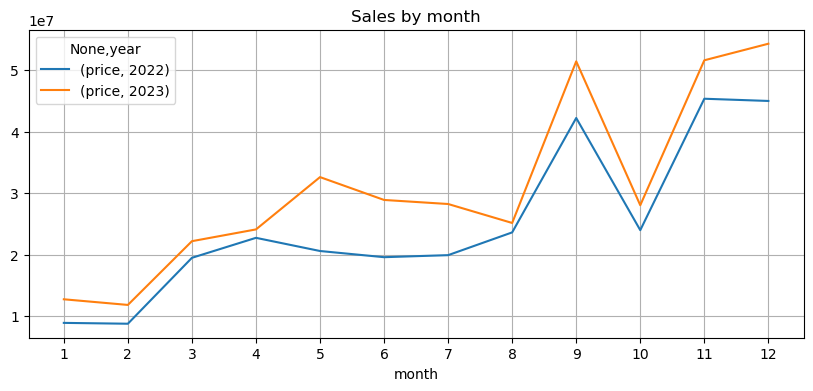

In [71]:
plt.figure()

df_pivot2.plot(title = 'Sales by month', figsize=(10, 4))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.grid(True)

Распределение дохода по месяцам 2022-2023 гг. точно такое же как и распределение по количеству проданных авто. Тенденция положительного роста продаж в 2023 году сохраняется.

<Axes: xlabel='annual_income'>

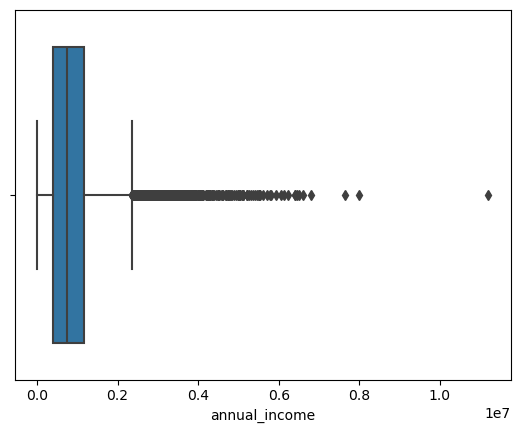

In [283]:
sns.boxplot(data=df,x='annual_income')

In [285]:
df.annual_income.median()

735000.0

Посмотрим есть ли взаимосвязь между доходами потребителей и ценой автомобилей, которые они покупают.

In [20]:
df.annual_income.corr(df.price)

0.012064959420296466

Полученное значение коэффициента корреляции очень низкое, то есть зависимость между доходом покупателя и стоимостью авто отсутствует. Проверим это с помощью графика корреляции.

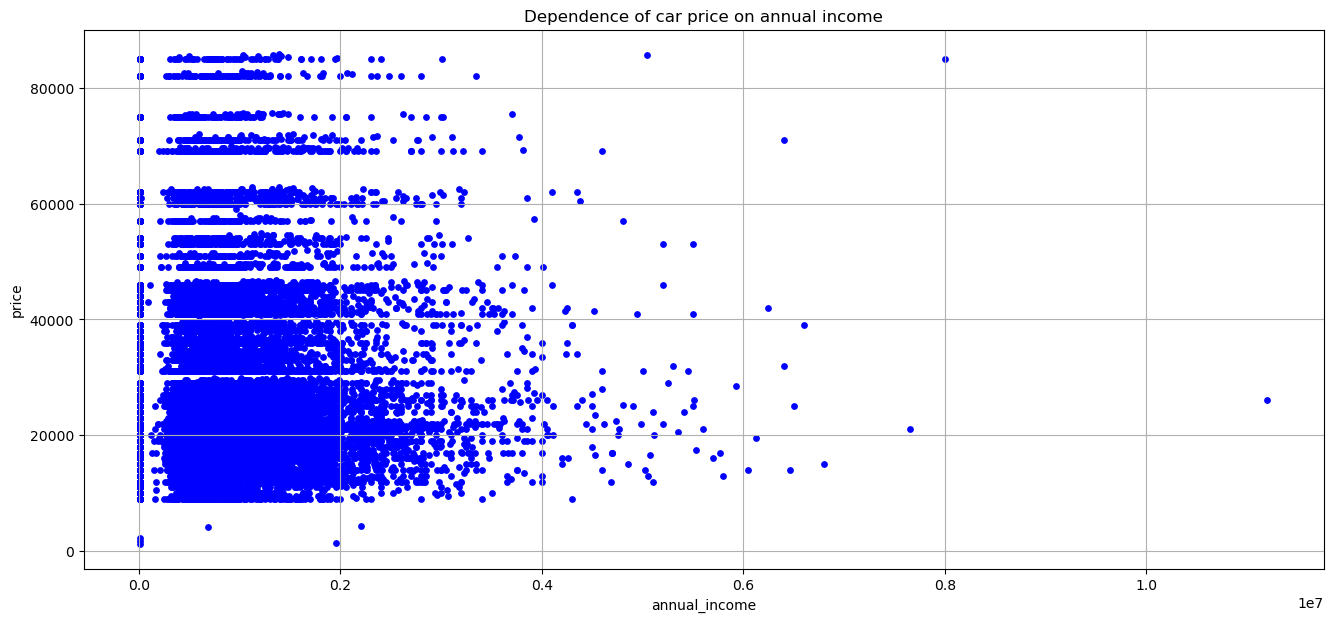

In [190]:
#зависимость годового дохода покупателя и стоимости авто.
df[df['annual_income']>].plot.scatter(x="annual_income", y="price", title = 'Dependence of car price on annual income', s= 15 , c='blue', figsize=(16, 7),)
plt.grid(True)

Явной зависимости стоимости покупаемого автомобиля от годового дохода покупателя не замечено. 
Можно отметить, что превалирующая часть покупателей имеют годовой доход до 200 тыс.долл, при этом они покупают, как правило, авто стоимостью в диапазоне от 8 000 до 47 000 долл. При этом имеются аномалии: есть часть покупателей с доходом в районе 10 тыс. долл, но покупающих авто стоимостью в довольно широком диапазоне - от 1200 до 85 000 долл. А покупатель с наибольшим годовым доходом (11,2 млн.долл) купил авто стоимостью всего 26 тыс. долл.

In [167]:
df.annual_income.min()

10080

In [168]:
df.price.min()

1200

In [169]:
df.annual_income.max()

11200000

In [187]:
df[df['annual_income'] == 11200000].price

14026    26001
Name: price, dtype: int64

In [75]:
#определение количества продаж в разрезе пола
df.gender.value_counts()

gender
Male      18797
Female     5108
Name: count, dtype: int64

In [81]:
#определение количества купленных авто в разрезе пола покупателя.
df_gender = df.groupby('gender').agg({'car_id': 'count'}).sort_values('gender', ascending = True)

Text(0, 0.5, '')

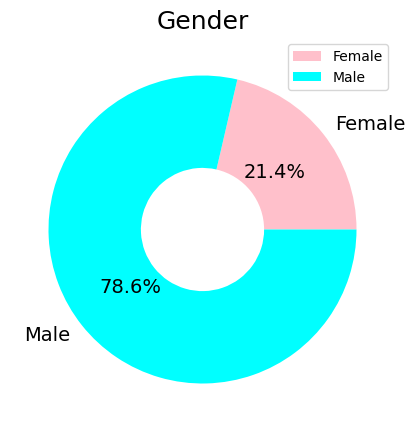

In [214]:
#соотношение покупок, совершаемых женщинами и мужчинами
df_gender.plot.pie(subplots=True, colors=["pink", "aqua"], autopct="%1.1f%%", fontsize=14, figsize=(5, 5),wedgeprops=dict(width=0.6))
plt.title('Gender', fontsize=18)
plt.ylabel('')

Как не странно, чаще покупают автомобили мужчины. Только каждая пятая покупка совершается женщинами.

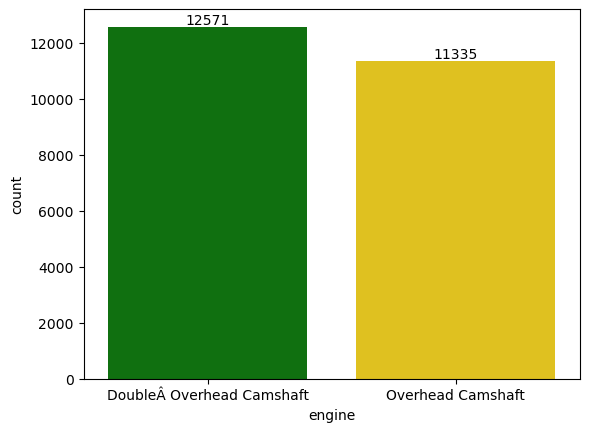

In [238]:
#определение соотношения типов двигателей
ax = sns.countplot(data=df,x='engine', palette= ['green','gold'])
for label in ax.containers:
    ax.bar_label(label)

In [ ]:
Чаще покупают авто с типом двигателя DOHS, или «двойной верхний распределительный вал». DOHC — двигатель, в котором для привода клапанов используется сразу два распределительных вала.

Text(0, 0.5, '')

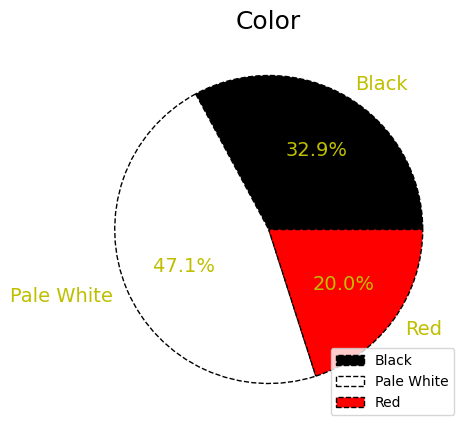

In [233]:
#соотношение покупаемых авто по цветам кузова
df_color = df.groupby('color').agg({'car_id': 'count'})
df_color.plot.pie(subplots=True, colors=["black", "white", "red"], autopct="%1.1f%%", fontsize=14, figsize=(5, 5), wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, textprops={'color':"y"})
plt.title('Color', fontsize=18)
plt.ylabel('')

Почти половина покупателей продпочитает белый цвет авто.

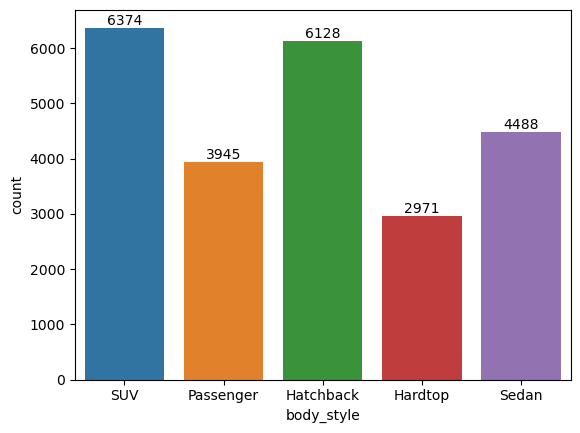

In [236]:
#выявление предпочтений покупателей по типу кузова
ax=sns.countplot(data=df,x= 'body_style')
for label in ax.containers:
    ax.bar_label(label)

Чаще всего покупатели выбирают внедорожники. Наименьшей популярностью пользуются хардтопы - это седан или купе без центральной стойки кузова и дверных рамок.

Text(0, 0.5, '')

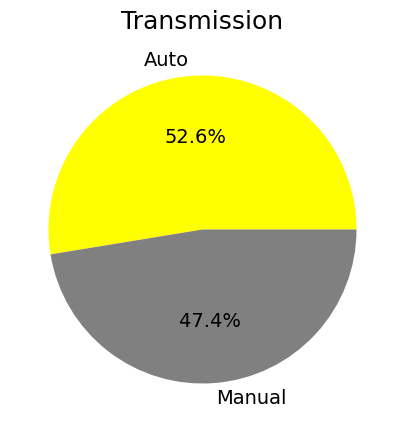

In [24]:
#соотношение покупок, совершаемых женщинами и мужчинами
df.transmission.value_counts().plot.pie(subplots=True, colors=["yellow", "grey"], autopct="%1.1f%%", fontsize=14, figsize=(5, 5))
plt.title('Transmission', fontsize=18)
plt.ylabel('')

In [ ]:
Большинство покупателей предпочитают автомобили "на автомате".

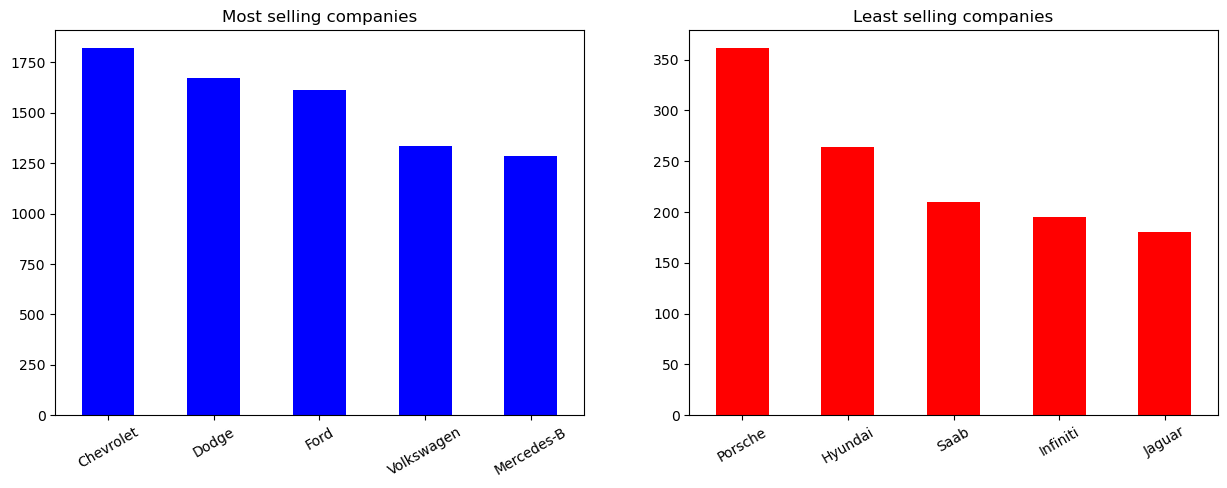

In [69]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

top_companies=df.company.value_counts().head(5)
unpopular_companies=df.company.value_counts().tail(5)

top_companies.plot(kind='bar',color='b',ax=ax[0])
ax[0].set_title('Most selling companies')
ax[0].set_ylabel('Count')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
plt.sca(ax[0])
plt.xticks(rotation=30)

unpopular_companies.plot(kind='bar',color='r',ax=ax[1])
ax[1].set_title('Least selling companies')
ax[1].set_ylabel('Count')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.sca(ax[1])
plt.xticks(rotation=30)

plt.show()

In [59]:
def calc(company):
    x=df['company']==company
    models=df[x]['model'].value_counts()
    length=len(cars[x])
    percantage=[(models[i]*100)/length for i in models.keys()]

    plt.figure(figsize=(20,8))
    plt.bar(x=models.keys(),height=percantage)
    plt.title(f"Percentge of each model of sales '{company}' ")
    plt.ylabel('Percntge %')
    plt.xlabel('Company Models ')
    plt.xticks(models.keys(),rotation=45)
    plt.show()

In [ ]:
for i in top_companies.keys():
    calc(i)

In [122]:
df.dealer_region.value_counts()

dealer_region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Greenville    3128
Middletown    3128
Name: count, dtype: int64

In [ ]:
Больше всего диллеров в регионе Austin (4135 дилееров).

<Axes: ylabel='company,model'>

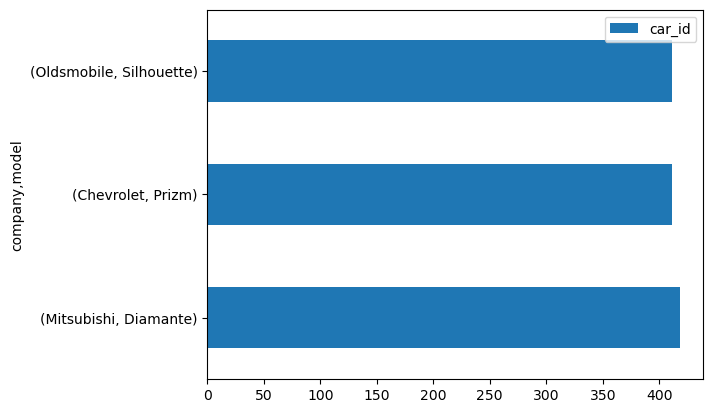

In [67]:
top10_model = df.groupby(['company', 'model']).agg({'car_id': 'count'}).sort_values(by = 'car_id',ascending = False).head(3)
top10_model.plot(kind = 'barh')

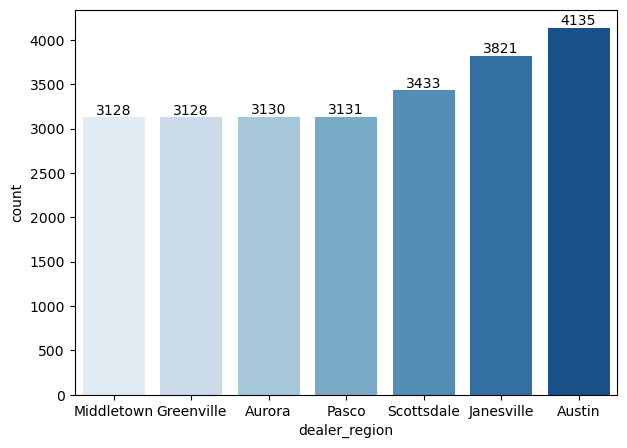

In [28]:
#распределение регионов по частоте приобретения авто
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df,x='dealer_region', order = df['dealer_region'].value_counts(ascending = True).index, palette = 'Blues')
for label in ax.containers:
    ax.bar_label(label)

Больше всего продали автомобилей за 2022-2023 гг. в Остине, за этот период было продано - 4135 автомобилей.

In [18]:
#Определение среднего дохода потребителей и средней цены покупаемых авто
income_mean = df['annual_income'].mean()
price_mean = df['price'].mean()
print(f'Average income: ${income_mean:.2f}')
print(f'Average price of all cars: ${price_mean:.2f}')

Average income: $830840.29
Average price of all cars: $28090.25


In [33]:
#Найдём общий доход от продажи авто за 2022-2023 гг.
df.price.sum()

671525465

In [36]:
#найдём кол-во проданных авто за эти два года
df.car_id.nunique()

23906

In [46]:
#найдём сумму покупок в разрезе марки авто
df_xyz = df.groupby(['company', 'model'], as_index = False).agg([{'car_id': 'count', 'price': 'sum'}]).rename(columns ={'car_id' : 'count', 'price' : 'sales'}).sort_values('count', ascending = False)
df_xyz.head()

TypeError: unhashable type: 'dict'

In [ ]:
df_xyz['sales'] = df.groupby(['company', 'model'], as_index = False).agg({'car_id': 'count'}).rename(columns ={'car_id' : 'count'}).sort_values('count', ascending = False)
df_xyz.head()

In [30]:
df.date.min()

Timestamp('2022-01-02 00:00:00')

In [31]:
df.date.max()

Timestamp('2023-12-31 00:00:00')

In [39]:
df.head()

,car_id,date,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region,month,year
0,C_CND_000001,2022-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown,1,2022
1,C_CND_000002,2022-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora,1,2022
2,C_CND_000003,2022-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,1,2022
3,C_CND_000004,2022-01-02,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,1,2022
4,C_CND_000005,2022-01-02,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,1,2022


Построим корреляционную матрицу для показателей

In [40]:
#выводим числовые столбцы
cars=df[['price', 'annual_income']]

In [53]:
#создаем фиктивные переменные
df_dummy = pd.get_dummies(data=df[['gender', 'company', 'engine', 'transmission', 'color', 'body_style']], drop_first = True)
df_dummy

,gender_Male,company_Audi,company_BMW,company_Buick,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,company_Ford,company_Honda,...,company_Volkswagen,company_Volvo,engine_Overhead Camshaft,transmission_Manual,color_Pale White,color_Red,body_style_Hatchback,body_style_Passenger,body_style_SUV,body_style_Sedan
0,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,False
23902,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23903,True,False,True,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,True
23904,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [54]:
df_dummy.replace()

/tmp/ipykernel_123/979101897.py:1: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_dummy.replace()


,gender_Male,company_Audi,company_BMW,company_Buick,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,company_Ford,company_Honda,...,company_Volkswagen,company_Volvo,engine_Overhead Camshaft,transmission_Manual,color_Pale White,color_Red,body_style_Hatchback,body_style_Passenger,body_style_SUV,body_style_Sedan
0,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,False
23902,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23903,True,False,True,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,True
23904,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [55]:
import numpy as np

In [56]:
total_cars = pd.concat([cars, df_dummy], axis=1)

In [57]:
total_cars.corr()

,price,annual_income,gender_Male,company_Audi,company_BMW,company_Buick,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,...,company_Volkswagen,company_Volvo,engine_Overhead Camshaft,transmission_Manual,color_Pale White,color_Red,body_style_Hatchback,body_style_Passenger,body_style_SUV,body_style_Sedan
price,1.000000,0.012065,-0.006592,-0.050055,-0.037498,0.051276,0.145859,-0.036708,-0.031044,-0.031215,...,-0.041437,-0.003768,-0.011271,-0.011271,-0.038677,0.021878,-0.038240,0.025606,-0.053925,0.056649
annual_income,0.012065,1.000000,0.054204,-0.002195,0.000089,0.004766,0.019218,-0.012586,0.000668,0.001426,...,0.007925,0.001727,-0.006598,-0.006598,0.000827,-0.003171,0.016581,-0.006474,-0.006258,-0.001096
gender_Male,-0.006592,0.054204,1.000000,0.010311,-0.000114,0.005170,-0.008576,0.000256,-0.003230,0.005220,...,-0.001858,-0.001379,0.002647,0.002647,-0.008777,0.004364,0.002658,-0.011016,0.006216,0.003646
company_Audi,-0.050055,-0.002195,0.010311,1.000000,-0.026123,-0.019327,-0.023661,-0.040552,-0.031328,-0.038738,...,-0.034339,-0.026106,0.049644,0.049644,-0.009288,-0.065483,-0.073972,-0.032723,0.152416,-0.067934
company_BMW,-0.037498,0.000089,-0.000114,-0.026123,1.000000,-0.025285,-0.030955,-0.053052,-0.040986,-0.050679,...,-0.044924,-0.034153,-0.019954,-0.019954,-0.050147,0.017306,0.030814,-0.082184,0.059992,0.034570
company_Buick,0.051276,0.004766,0.005170,-0.019327,-0.025285,1.000000,-0.022902,-0.039251,-0.030323,-0.037495,...,-0.033237,-0.025268,-0.033788,-0.033788,0.003308,-0.030362,0.070979,0.066773,-0.072606,-0.033043
company_Cadillac,0.145859,0.019218,-0.008576,-0.023661,-0.030955,-0.022902,1.000000,-0.048053,-0.037124,-0.045903,...,-0.040691,-0.030935,-0.015504,-0.015504,-0.037555,-0.001746,-0.038311,0.086072,-0.037078,0.026699
company_Chevrolet,-0.036708,-0.012586,0.000256,-0.040552,-0.053052,-0.039251,-0.048053,1.000000,-0.063624,-0.078672,...,-0.069738,-0.053018,0.058301,0.058301,0.043155,-0.003821,-0.053579,0.050928,0.028544,-0.093525
company_Chrysler,-0.031044,0.000668,-0.003230,-0.031328,-0.040986,-0.030323,-0.037124,-0.063624,1.000000,-0.060778,...,-0.053876,-0.040959,-0.105469,-0.105469,0.026037,-0.024994,0.033959,-0.078830,0.006884,0.026733
company_Dodge,-0.031215,0.001426,0.005220,-0.038738,-0.050679,-0.037495,-0.045903,-0.078672,-0.060778,1.000000,...,-0.066618,-0.050646,-0.055625,-0.055625,-0.018662,0.036049,-0.031315,-0.026408,0.069550,-0.071296


In [22]:
from scipy import stats
import scipy.special as sps

In [27]:
corr_df = df[['price','annual_income','company']]
corr_df.corr()

ValueError: could not convert string to float: 'Ford'